<a href="https://colab.research.google.com/github/Janardan-thapaliya/Deep_Learning_CNN/blob/main/Cats_Vs_Dogs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:18<00:00, 34.7MB/s]
100% 1.06G/1.06G [00:18<00:00, 61.4MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [5]:
#Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [129]:
#Create CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(256, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(512, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='HeUniform', bias_initializer='HeNormal'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_initializer='HeUniform', bias_initializer='HeNormal'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [130]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_42 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_44 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_45 (MaxPooling2D)      │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_46 (MaxPooling2D)      │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 128)                 │       2,359,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,936,321 (15.02 MB)

 Trainable params: 3,936,321 (15.02 MB)

 Non-trainable params: 0 (0.00 B)

In [131]:
model.compile(optimizer='adamw', loss='binary_crossentropy', metrics=['accuracy'])

In [132]:
callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=6,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,
)

In [133]:
history = model.fit(train_ds, epochs= 30, validation_data=validation_ds, callbacks=callback)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 104ms/step - accuracy: 0.5156 - loss: 0.6979 - val_accuracy: 0.6684 - val_loss: 0.6257
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.6724 - loss: 0.6163 - val_accuracy: 0.7292 - val_loss: 0.5502
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 83ms/step - accuracy: 0.7323 - loss: 0.5501 - val_accuracy: 0.7864 - val_loss: 0.4628
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 82ms/step - accuracy: 0.7796 - loss: 0.4748 - val_accuracy: 0.8278 - val_loss: 0.3924
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 84ms/step - accuracy: 0.8185 - loss: 0.4009 - val_accuracy: 0.8256 - val_loss: 0.3847
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.8590 - loss: 0.3362 - val_accuracy: 0.8662 - val_loss: 0.3194
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.8825 - loss: 0.2828 - val_accuracy: 0.8814 - val_loss: 0.2933
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.9082 - loss: 0.2303 -

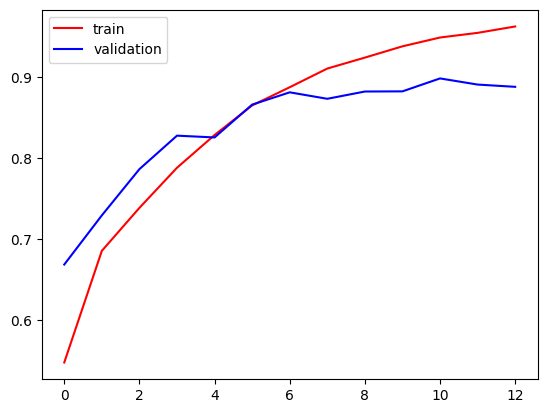

In [134]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

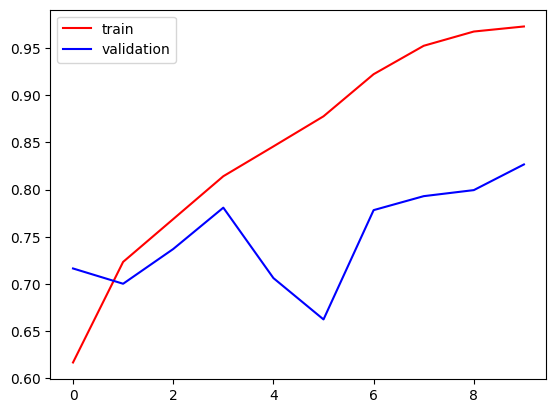

In [ ]:
#After Batch Normalization and DropOut

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

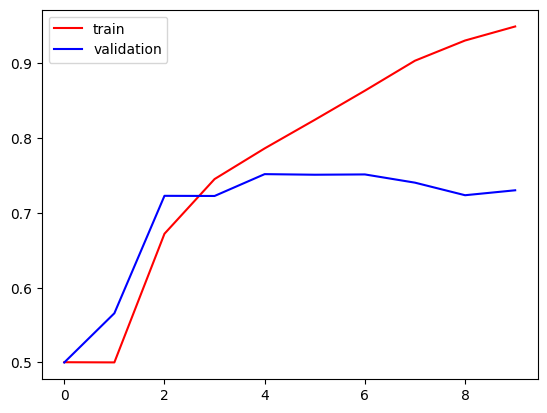

In [ ]:
#Removing the Batch Normalization and Adding one more Convolutional layer

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

In [ ]:
#Ways to reduce Overfitting

#Add more data: Data Augmentation
#L1/L2 Regularization
#Dropout
#Batch Normalization
#Reduce Complexity

In [135]:
#Prediction

import cv2

In [136]:
test_img1 = cv2.imread('/content/cat.jpg')
test_img2 = cv2.imread('/content/dog.jpg')

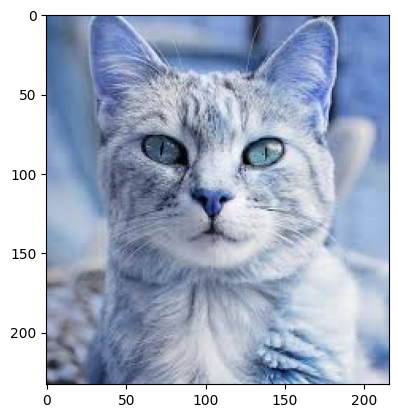

In [137]:
plt.imshow(test_img1)

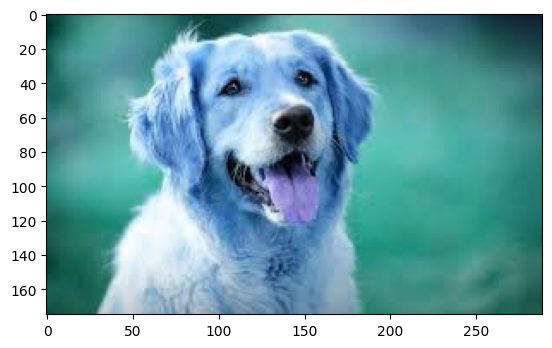

In [138]:
plt.imshow(test_img2)

In [139]:
test_img1.shape

(233, 216, 3)

In [140]:
test_img2.shape

(175, 289, 3)

In [141]:
test_img1 = cv2.resize(test_img1, (256,256))

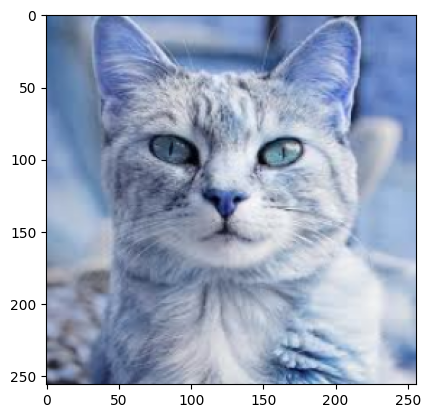

In [142]:
plt.imshow(test_img1)

In [143]:
#Since the model expects data in batches, we tell the model that there's a single image in this batch using 4D tensor (1-number of image, (256,256)-size and 3-colour 'RGB' value)
test_input1 = test_img1.reshape((1, 256, 256, 3))

In [147]:
#Here, 0 means Cat and 1 means Dog
result1 = model.predict(test_input1)
print(predict(result1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Cat


In [148]:
test_img2 = cv2.resize(test_img2, (256,256))
test_input2 = test_img2.reshape((1, 256, 256, 3))
result2 = model.predict(test_input2)
print(predict(result2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Dog


In [146]:
#Encoding '1' and '0' to Dog and Cat
def predict(result):
  if result[0] == 0:
    return "Cat"
  else:
    return "Dog"